In [1]:
from frame_postprocess import *

set_plot_formatting()
color_specs = ['tab:red','tab:green','tab:orange','tab:purple','tab:olive'] #
# color_specs = [(56/255, 95/255, 150/255), (207/255, 89/255, 33/255), (231/255, 184/255, 0/255), (158/255, 184/255, 219/255),
#                (128/255, 0/255, 0/255)]

#### INPUTS

Building geometry and relevant properties

In [2]:
bldg_name  = 'MainPlace Mall'
cvn = 12

results_main_folders = ['NLRHA', 'NLRHA_FiberCVN8ftlb', 'NLRHA_FiberCVN12ftlb_RetrofitColumn', 'NLRHA_RetrofitColumn']
title_text = ['ASCE41 (BSE-2E)', 'CVN=8ft-lb (BSE-2E)', 'CVN=12ft-lb\nW14X500 (BSE-2E)', 'ASCE41\nW14X500 (BSE-2E)']
    
##### Frame data #####
n_stories = 3

## Retrieve inputs for plots ##
cvn           = 8  # ft-lb
a0            = 0.1
distribution  = 'Constant'
splice        = 0

story_heights = np.array([18.67*12,
                18.5*12,
                (14.5*12+12.75*12)])
beam_list   = np.array([1,
                        1,
                        1]).reshape(-1,1)
column_list = np.array([[1, 1],
                        [1, 1],
                        [1, 1]])
bay_widths  = np.array([30*12])
n_bays      = len(bay_widths) 


#### COLLECT RESULTS FROM NLRHA

In [3]:
pid = {}

for model_i, results_folder in enumerate(results_main_folders):
    
    print(results_folder)
    
    # Get list of ground motions
    filelist = os.listdir(results_folder)
    gm_list = []
    for file in filelist:
        if os.path.isdir(os.path.join(results_folder, file)) and file != 'GroundMotion':
            gm_list.append(file)
    
    # Collect drift envelope per story per ground motion
    story_response = []    
    for gm_i, gm_name in enumerate(gm_list):    
        results_gm_folder = os.path.join(results_folder, gm_name)  
        aux = get_story_response(results_gm_folder, beam_list, ['drift_env'])
        aux = aux['drift_env'].flatten()
        aux = np.hstack([aux, aux[-1]]) # repeat last story result for proper plotting
        
        story_response.append(aux)
    
    pid[results_folder] = story_response

NLRHA
NLRHA_FiberCVN8ftlb
NLRHA_FiberCVN12ftlb_RetrofitColumn
NLRHA_RetrofitColumn


#### PLOT NLRHA STATS

3

8

5

5

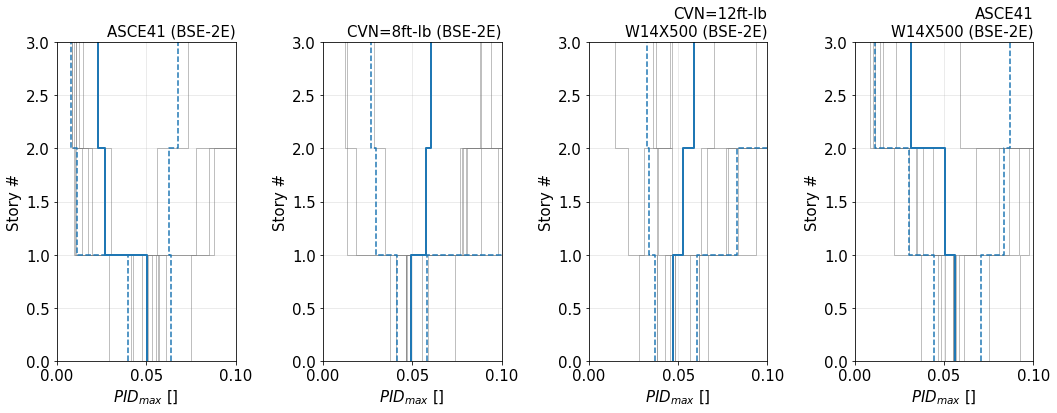

In [4]:
EDP        = 'PID'
edp_limits = [0, 0.10]

fig, ax_list = plt.subplots(1, len(results_main_folders), figsize=(15,6))

for folder_i, results_folder in enumerate(results_main_folders):
    ax         = ax_list[folder_i]
    edp2plot   = pid[results_folder]
    plot_response_in_height(EDP, edp2plot, title_text[folder_i], edp_limits, ax, color_record='grey')
    _ = ax.set_ylim([0, n_stories])
    
    sum(np.max(pid[results_folder], axis=1) > 0.08)


plt.tight_layout()